In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
Invitations=pd.read_csv(r'C:\Users\Andrea\Desktop\My_LinkedIn\Basic_Information_Files\Invitations.csv')
Invitations.tail()

,From,To,Sent At,Message,Direction
577,Aldo Javier Martinez Hutter,Marcela Huerfano,"12/5/19, 1:47 PM",NaN,INCOMING
578,Lina Marcela Escudero Góngora,Marcela Huerfano,"12/5/19, 1:43 PM",NaN,INCOMING
579,Edier Pacheco,Marcela Huerfano,"12/5/19, 11:42 AM",NaN,INCOMING
580,Andres Maldonado,Marcela Huerfano,"12/4/19, 5:51 PM",NaN,INCOMING
581,Absolute Latam,Marcela Huerfano,"12/4/19, 3:05 PM",NaN,INCOMING


In [3]:
Invitations.dtypes

From         object
To           object
Sent At      object
Message      object
Direction    object
dtype: object

In [4]:
rule1 = r'(?P<Month>\d{1,2})[/](?P<Day>\d{1,2})[/](?P<Year>\d{2})'
rule2 = r'(?P<Date>\d{1,2}[/]\d{1,2}[/]\d{2})'
rule3 = r'(?P<Hour>\d{1,2}[:]\d{1,2}[ ]\w{1,2})'

extract_df = Invitations['Sent At'].str.lower().str.extract(rule1)
extract_df['Date']=Invitations['Sent At'].str.lower().str.extract(rule2)
extract_df['Hour']=Invitations['Sent At'].str.lower().str.extract(rule3)
extract_df.head()

,Month,Day,Year,Date,Hour
0,12,12,20,12/12/20,10:16 am
1,12,11,20,12/11/20,3:48 pm
2,12,11,20,12/11/20,12:43 pm
3,12,11,20,12/11/20,5:52 am
4,12,9,20,12/9/20,10:19 am


In [5]:
Invitations=pd.concat([Invitations, extract_df], axis=1)
Invitations.tail()

,From,To,Sent At,Message,Direction,Month,Day,Year,Date,Hour
577,Aldo Javier Martinez Hutter,Marcela Huerfano,"12/5/19, 1:47 PM",NaN,INCOMING,12,5,19,12/5/19,1:47 pm
578,Lina Marcela Escudero Góngora,Marcela Huerfano,"12/5/19, 1:43 PM",NaN,INCOMING,12,5,19,12/5/19,1:43 pm
579,Edier Pacheco,Marcela Huerfano,"12/5/19, 11:42 AM",NaN,INCOMING,12,5,19,12/5/19,11:42 am
580,Andres Maldonado,Marcela Huerfano,"12/4/19, 5:51 PM",NaN,INCOMING,12,4,19,12/4/19,5:51 pm
581,Absolute Latam,Marcela Huerfano,"12/4/19, 3:05 PM",NaN,INCOMING,12,4,19,12/4/19,3:05 pm


In [6]:
Int_list=['Month', 'Day', 'Year']
for variable in Int_list:
    Invitations[variable]=Invitations[variable].astype(int)
Invitations.dtypes

From         object
To           object
Sent At      object
Message      object
Direction    object
Month         int32
Day           int32
Year          int32
Date         object
Hour         object
dtype: object

In [7]:
pivot=Invitations.pivot_table(index=['Year', 'Month'] , columns=['Direction'],values='From', aggfunc='count').fillna(0) #, columns='Month'
pivot

Direction   INCOMING  OUTGOING
Year Month                    
19   12         29.0       0.0
20   1          12.0       0.0
     2           8.0       0.0
     3           3.0       2.0
     4           1.0       0.0
     5           0.0       2.0
     6          28.0       4.0
     7          82.0      31.0
     8          77.0      22.0
     9          73.0      20.0
     10         65.0      25.0
     11         54.0      15.0
     12         23.0       6.0

<IPython.core.display.Javascript object>


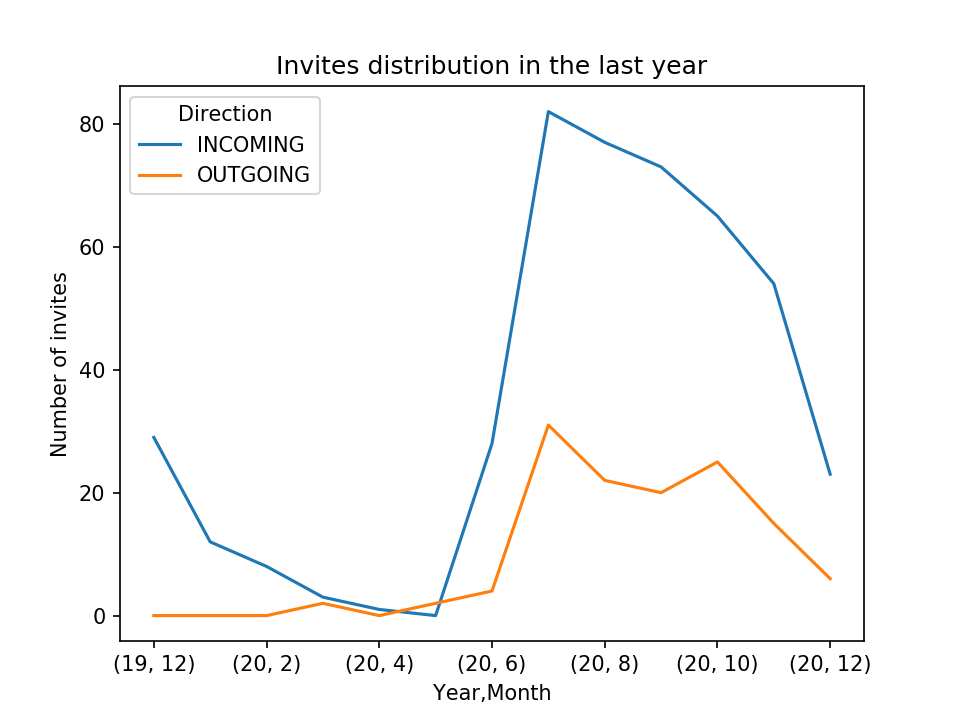

In [8]:
pivot.sort_values(['Year', 'Month'], ascending=True)
pivot.plot()
plt.title('Invites distribution in the last year')
plt.ylabel('Number of invites')
plt.show()